In [1]:
import medlatin
import re
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [2]:
# load the style vectors from csv files
path = 'csvfiles'
tfidf_dict = {}
for filename in os.listdir(path):
    if filename.startswith('tfidf'):
        ngram, rank = re.findall('\d+', filename)
        ngram = int(ngram)
        rank = int(rank)
        if ngram in tfidf_dict:
            tfidf_dict[ngram][rank] = np.genfromtxt(os.path.join(path, filename), delimiter=',')
        else:
            tfidf_dict[ngram] = {}
            tfidf_dict[ngram][rank] = np.genfromtxt(os.path.join(path, filename), delimiter=',')

medlatin_emb = np.genfromtxt('csvfiles/embeddings.csv', delimiter=',')

with open('csvfiles/author_changes_names.txt', 'r', encoding='utf-8') as f:
    author_names = [name.strip() for name in f.readlines()]

with open('csvfiles/author_changes_idx.txt', 'r', encoding='utf-8') as f:
    author_idx = [int(idx.strip()) for idx in f.readlines()]

In [3]:
ngrams_list = [2, 3, 4]
ranks_list = [100, 200, 300]

### Show pairwise distances

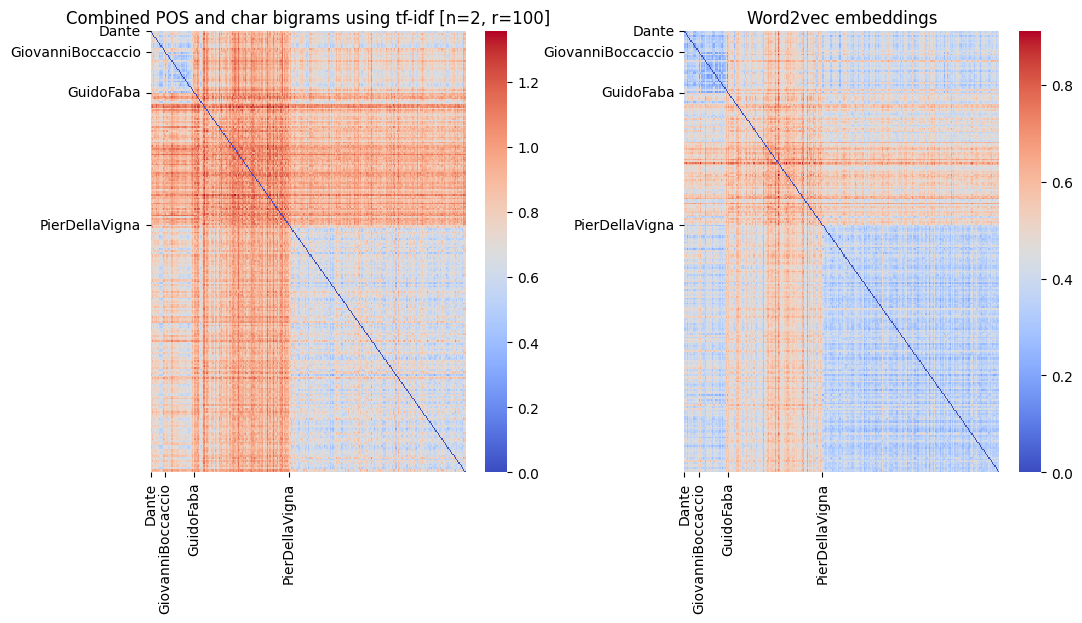

In [4]:
n = 2
r = 100
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
plt.tight_layout(w_pad=7)

sns.heatmap(pairwise_distances(tfidf_dict[n][r]), cmap='coolwarm', ax=axes[0])
axes[0].set_title(f'Combined POS and char bigrams using tf-idf [n={n}, r={r}]')
axes[0].set_yticks(author_idx)
axes[0].set_yticklabels(author_names)
axes[0].set_xticks(author_idx)
axes[0].set_xticklabels(author_names)

sns.heatmap(pairwise_distances(medlatin_emb), cmap='coolwarm', ax=axes[1])
axes[1].set_title(f'Word2vec embeddings')
axes[1].set_yticks(author_idx)
axes[1].set_yticklabels(author_names)
axes[1].set_xticks(author_idx)
axes[1].set_xticklabels(author_names);

### Show concordance rates

In [5]:
# there are four different authors in the reduced set of texts
n_authors = len(author_names)
kmean_dict = {}
for ngram in tfidf_dict:
    kmean_dict[ngram] = {}
    for rank in tfidf_dict[ngram]:
        # the default number of repeats is 100
        kmean_dict[ngram][rank] = medlatin.repeat_kmeans(tfidf_dict[ngram][rank], clusters=n_authors)

# the default number of repeats is 100
kmeans_emb = medlatin.repeat_kmeans(medlatin_emb, clusters=n_authors)
concordance_tfidf = medlatin.concordance_heatmap(kmean_dict[n][r])
concordance_emb = medlatin.concordance_heatmap(kmeans_emb)

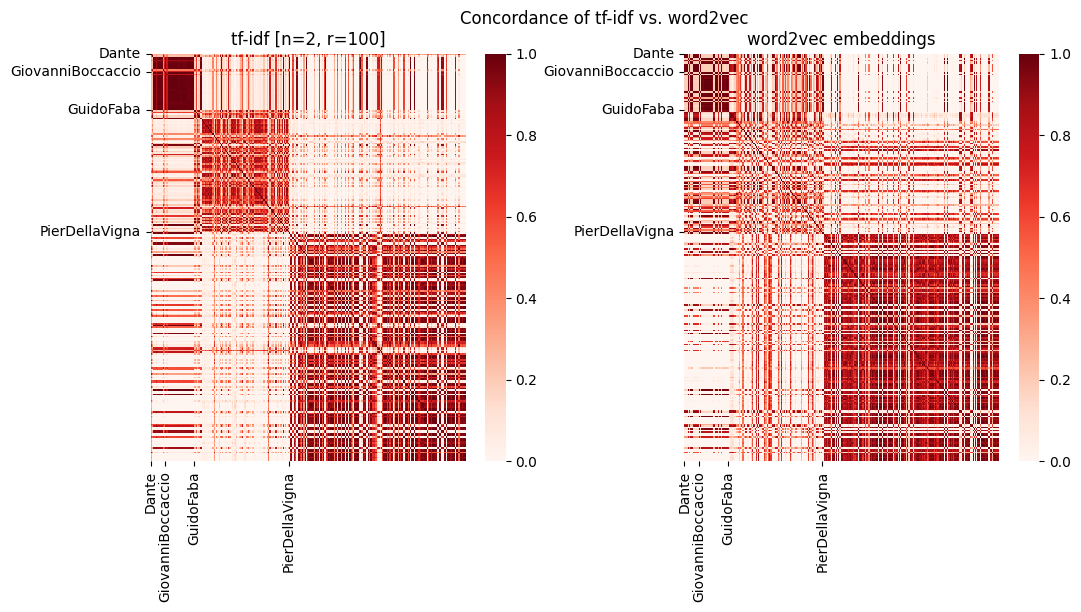

In [6]:
# this is just a quick sanity check against the word2vec embeddings - my tf-idf vectors seem to work best
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.suptitle('Concordance of tf-idf vs. word2vec')
plt.tight_layout(w_pad=7)

sns.heatmap(concordance_tfidf, cmap='Reds', ax=axes[0])
axes[0].set_title(f'tf-idf [n={n}, r={r}]')
axes[0].set_yticks(author_idx)
axes[0].set_yticklabels(author_names)
axes[0].set_xticks(author_idx)
axes[0].set_xticklabels(author_names)

sns.heatmap(concordance_emb, cmap='Reds', ax=axes[1])
axes[1].set_title(f'word2vec embeddings')
axes[1].set_yticks(author_idx)
axes[1].set_yticklabels(author_names)
axes[1].set_xticks(author_idx)
axes[1].set_xticklabels(author_names);

In [7]:
concordances_dict = {}
for ngram in kmean_dict:
    concordances_dict[ngram] = {}
    for rank in kmean_dict[ngram]:
        concordances_dict[ngram][rank] = medlatin.concordance_heatmap(kmean_dict[ngram][rank])

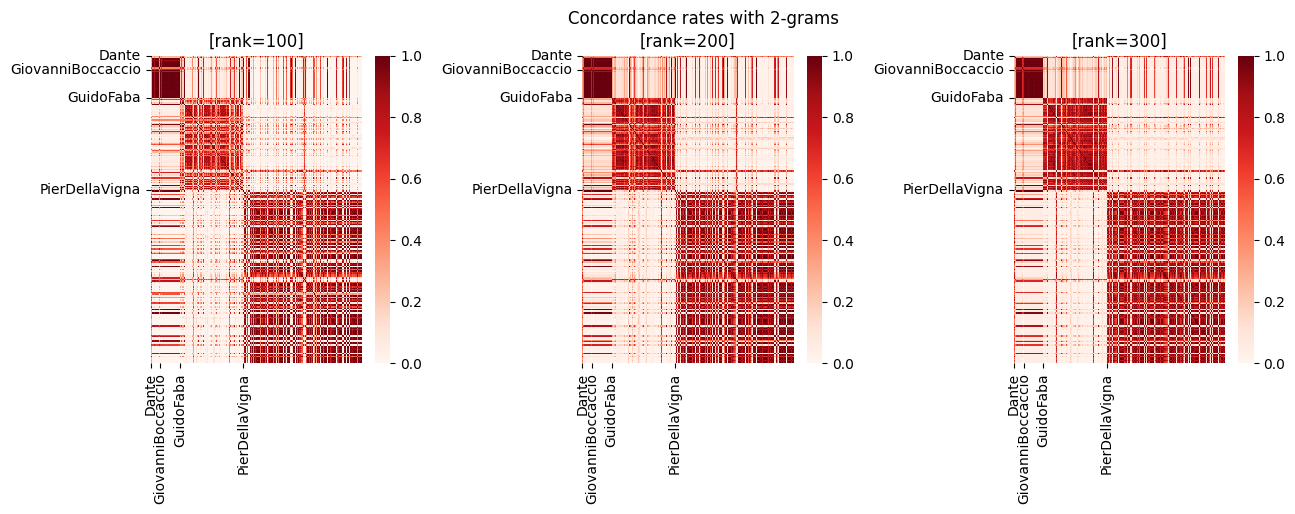

In [8]:
n = 2
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticks(author_idx)
    ax.set_yticklabels(author_names)
    ax.set_xticks(author_idx)
    ax.set_xticklabels(author_names)

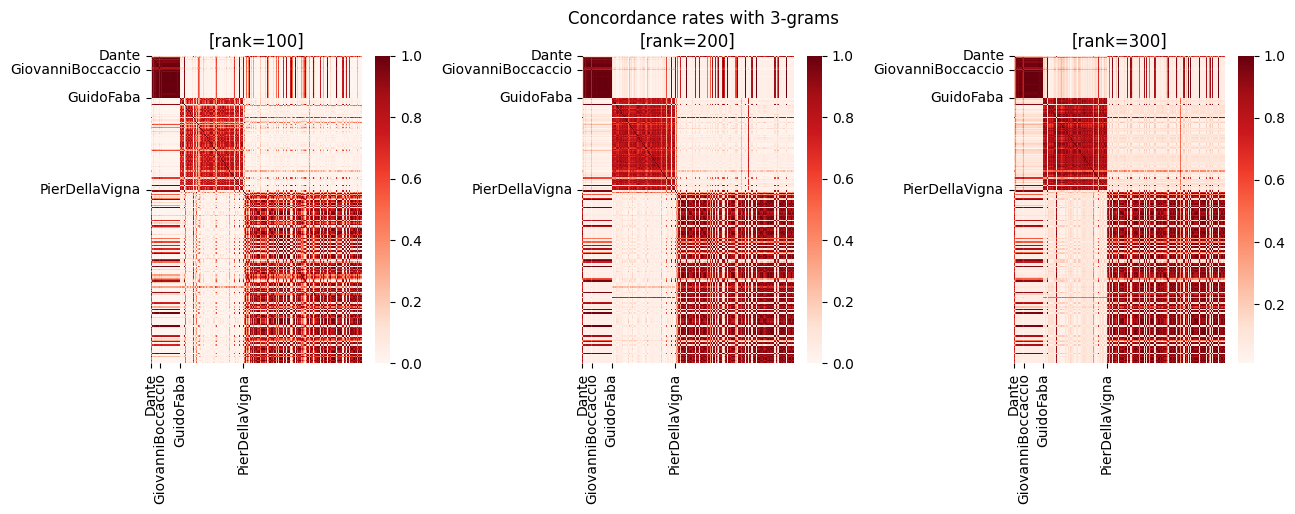

In [9]:
n = 3
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticks(author_idx)
    ax.set_yticklabels(author_names)
    ax.set_xticks(author_idx)
    ax.set_xticklabels(author_names)

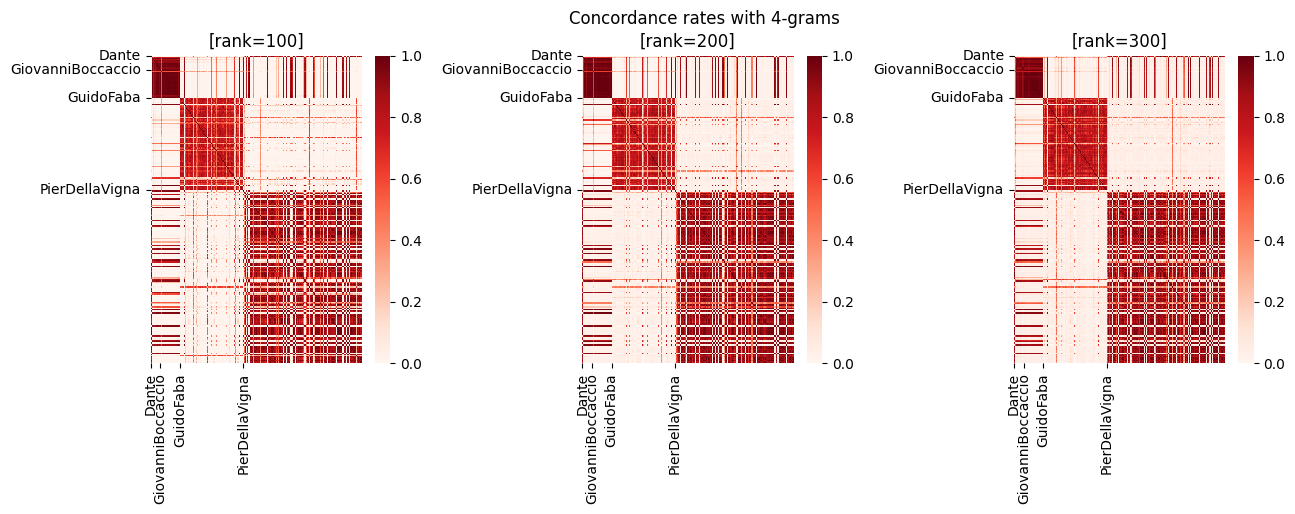

In [10]:
n = 4
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticks(author_idx)
    ax.set_yticklabels(author_names)
    ax.set_xticks(author_idx)
    ax.set_xticklabels(author_names)